### Requirements

### Importing Necessary libraries

### Data reading 

In [99]:
df = pd.read_csv('train.csv')

# Data exploration Visualization and transformation and cleaning
-   #### stage 1 Treatment of missing values 
-   #### stage 2
-   #### stage 3
-   #### stage 4

- changes in feature names for better accessibility.

In [100]:
change_dict = {'warehouse_ID':'whouseid',
               'Product_Type':'ptype',
               'is_weekend':'weekend',
               'is_warehouse_closed':'whclosed',
               'daily_dispatch_count':'ddcount',
               'weekly_dispatch_count':'wdcount'}

In [101]:
df.rename(columns=change_dict,inplace=True)

- IDs are all unique for all the rows. (The following cell confirms this).
- So it's an unnecessary column, it can be dropped.

In [102]:
len(df.ID.unique()) == len(df)

True

In [103]:
df.drop(columns='ID',inplace=True)

In [104]:
df.head()

,date,whouseid,Latitude,Longitude,ptype,year,month,weekend,whclosed,ddcount,wdcount
0,2017-01-01,WH_0x3e9,41.681471,-72.794746,Type_A,2017,January,Yes,No,5.5,5.5
1,2017-01-01,WH_0x3ea,38.749077,-105.183060,Type_A,2017,January,Yes,No,6.1,6.1
2,2017-01-02,WH_0x3e9,41.681471,-72.794746,Type_A,2017,January,No,No,4.8,NaN
3,2017-01-02,WH_0x3ea,38.749077,-105.183060,Type_A,2017,January,No,No,6.7,NaN
4,2017-01-03,WH_0x3e9,41.681471,-72.794746,Type_A,2017,January,No,No,5.8,NaN


- ### Some quick observations :
- Observe columns where missing values exist.
   - Latitude
   - Longitude
   - weekend
   - whclosed

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16644 entries, 0 to 16643
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       16644 non-null  object 
 1   whouseid   16644 non-null  object 
 2   Latitude   16312 non-null  float64
 3   Longitude  16228 non-null  float64
 4   ptype      16644 non-null  object 
 5   year       16644 non-null  int64  
 6   month      16644 non-null  object 
 7   weekend    16145 non-null  object 
 8   whclosed   16478 non-null  object 
 9   ddcount    16644 non-null  float64
 10  wdcount    2372 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1.4+ MB


- #### summery statistics

In [63]:
df.describe()

,Latitude,Longitude,year,ddcount,wdcount
count,16312.000000,16228.000000,16644.000000,16644.000000,2372.000000
mean,37.721350,-93.987807,2019.442802,5.042640,35.233938
std,7.403689,17.907439,1.058141,3.304978,20.953378
min,25.750156,-149.125259,2017.000000,0.000000,0.000000
25%,34.361664,-105.183060,2019.000000,2.800000,19.475000
50%,37.915825,-87.551186,2020.000000,4.400000,30.100000
75%,41.681471,-80.279640,2020.000000,7.500000,52.000000
max,61.600803,-72.794746,2021.000000,17.900000,96.400000


In [106]:
df.describe(include=object)

,date,whouseid,ptype,month,weekend,whclosed
count,16644,16644,16644,16644,16145,16478
unique,1581,10,2,12,2,2
top,2021-04-30,WH_0x3e9,Type_A,March,No,No
freq,20,2796,8688,1674,11549,15365


#### stage 1

In [112]:
print(len(df.Latitude.unique()))  # 11 including 1 'nan' , actualy 10 unique pairs of latititude and longitude
print(len(df.Latitude.unique()) == len(df.Longitude.unique())) 
df.Latitude.unique()

11
True


array([41.681471, 38.749077,       nan, 35.67897 , 34.361664, 25.750156,
       30.189375, 41.611603, 48.692551, 37.915825, 61.600803])

In [114]:
# df[['Latitude','Longitude']].plot(kind = 'scatter',x ='Latitude',y ='Latitude',figsize =(20,12))

- #### Rows where both Latitude and Longitude value are missing, we have no other option but to remove them. 

In [115]:
rows_where_either_lat_long_missing = len(df[(df.Latitude.isnull() | df.Longitude.isnull())])
rows_where_both_lat_long_missing   = len(df[(df.Latitude.isnull() & df.Longitude.isnull())])
rows_to_be_imputed = rows_where_either_lat_long_missing - rows_where_both_lat_long_missing 

- #### rounding of latitude longitude values for better plots later

In [68]:
df['Latitude']=df.Latitude.apply(lambda x : round(x,2))
df['Longitude']=df.Longitude.apply(lambda x : round(x,2))

In [116]:
'{} rows are there where either Latitude or Longitude values are missing.By observation,latitude-longitude pairs are unique,so wherever one is missing it can be filled.There are {} rows where both latitude and logitude values are missing they need to be dropped, so {} rows can be easily saved from leaking'.format(rows_where_either_lat_long_missing,rows_where_both_lat_long_missing,rows_to_be_imputed)

'736 rows are there where either Latitude or Longitude values are missing.By observation,latitude-longitude pairs are unique,so wherever one is missing it can be filled.There are 12 rows where both latitude and logitude values are missing they need to be dropped, so 724 rows can be easily saved from leaking'

-  filling nans with "mv"
-  finding unique latitude-longitude pairs

In [117]:
df.fillna('mv',inplace=True)
latitudes = list(df.Latitude.unique())
latitudes.remove('mv')

lat_lon_pairs = []
for lat in latitudes:
    long = df[df.Latitude == lat]['Longitude'].iloc[1]
    lat_lon_pairs.append((lat,long))

print(lat_lon_pairs) 

[(41.681471, -72.79474599999999), (38.749077, -105.18306), (35.67897, -109.067413), (34.361664000000005, -86.305595), (25.750156, -80.27964), (30.189375, -82.64825400000001), (41.611603, -87.551186), (48.692551, -116.319862), (37.915825, -89.829262), (61.600803000000006, -149.125259)]


- #### filling where one of lat and long is nan

In [71]:
for i in range(len(df)):
    if df.Latitude.iloc[i] and df.Longitude.iloc[i] == 'mv':
        for lat_lon_pair in lat_lon_pairs:
            if df.Latitude.iloc[i] == lat_lon_pair[0]:
                df.iloc[i,df.columns.get_loc('Longitude')] = lat_lon_pair[1]
    if df.Longitude.iloc[i] and df.Latitude.iloc[i] == 'mv':
        for lat_lon_pair in lat_lon_pairs:
            if df.Longitude.iloc[i] == lat_lon_pair[1]:
                df.iloc[i,df.columns.get_loc('Latitude')] = lat_lon_pair[0]       

- #### checking on the effect 

In [72]:
rows_where_either_lat_long_missing = len(df[(df.Latitude.isnull() | df.Longitude.isnull())])
rows_where_both_lat_long_missing   = len(df[(df.Latitude.isnull() & df.Longitude.isnull())])
rows_where_both_lat_long_missing == rows_where_either_lat_long_missing

True

- #### filtering out those 12 rows

In [73]:
df=df[df['Latitude'] != 'mv']
df=df.reset_index()
df.drop(columns=['index'],axis=1,inplace=True)

- #### deal with weekend , whclosed , and obviously wdcount

In [74]:
for feature in df.columns:
    print(feature,len(df[df[feature]=='mv']))

date 0
whouseid 0
Latitude 0
Longitude 0
ptype 0
year 0
month 0
weekend 499
whclosed 166
ddcount 0
wdcount 14262


- #### convering date from object to datetime for filling 'weekend' column

In [75]:
# weekend missing values can be dealt with date time processing 
df['date'] = pd.to_datetime(df['date'])
df.dtypes


date         datetime64[ns]
whouseid             object
Latitude             object
Longitude            object
ptype                object
year                  int64
month                object
weekend              object
whclosed             object
ddcount             float64
wdcount              object
dtype: object

In [76]:
df.weekend.unique()

array(['Yes', 'No', 'mv'], dtype=object)

In [77]:
df['weekend']=df['date'].dt.dayofweek > 4

In [78]:
df.weekend.unique()

array([ True, False])

In [79]:
for feature in df.columns:
    print(feature,len(df[df[feature]=='mv']))

date 0
whouseid 0
Latitude 0
Longitude 0
ptype 0
year 0
month 0
weekend 0
whclosed 166
ddcount 0
wdcount 14262


In [80]:
# ware house closed 
df.whclosed.value_counts()

No     15353
Yes     1113
mv       166
Name: whclosed, dtype: int64

In [81]:
df[df['whclosed']=='mv'].ptype.value_counts()

Type_A    83
Type_B    83
Name: ptype, dtype: int64

#### Droping rowswhere whclosed is missing

In [82]:
df=df[df['whclosed']!= 'mv']

In [83]:
for feature in df.columns:
    print(feature,len(df[df[feature]=='mv']))

date 0
whouseid 0
Latitude 0
Longitude 0
ptype 0
year 0
month 0
weekend 0
whclosed 0
ddcount 0
wdcount 14115


#### are warehouse id and lat-long correlated , then we can leave one 

In [84]:
for whid in df['whouseid'].unique():
    print(whid,df[df['whouseid']==whid].Latitude.unique(),df[df['whouseid']==whid].Longitude.unique())

WH_0x3e9 [41.68] [-72.79]
WH_0x3ea [38.75] [-105.18]
WH_0x3eb [35.68] [-109.07]
WH_0x3ec [34.36] [-86.31]
WH_0x3ed [25.75] [-80.28]
WH_0x3ee [30.19] [-82.65]
WH_0x3ef [41.61] [-87.55]
WH_0x3f1 [48.69] [-116.32]
WH_0x3f0 [37.92] [-89.83]
WH_0x3f2 [61.6] [-149.13]


### wdcount

In [85]:
df[df['wdcount']!='mv']

,date,whouseid,Latitude,Longitude,ptype,year,month,weekend,whclosed,ddcount,wdcount
0,2017-01-01,WH_0x3e9,41.68,-72.79,Type_A,2017,January,True,No,5.5,5.5
1,2017-01-01,WH_0x3ea,38.75,-105.18,Type_A,2017,January,True,No,6.1,6.1
14,2017-01-08,WH_0x3e9,41.68,-72.79,Type_A,2017,January,True,No,4.5,37.1
15,2017-01-08,WH_0x3ea,38.75,-105.18,Type_A,2017,January,True,No,6.5,48.3
28,2017-01-15,WH_0x3e9,41.68,-72.79,Type_A,2017,January,True,No,4.6,37.5
...,...,...,...,...,...,...,...,...,...,...,...
16527,2021-04-25,WH_0x3f0,37.92,-89.83,Type_B,2021,April,True,No,3.8,16.8
16528,2021-04-25,WH_0x3f1,48.69,-116.32,Type_A,2021,April,True,No,5.6,43.5
16529,2021-04-25,WH_0x3f1,48.69,-116.32,Type_B,2021,April,True,Yes,0.0,12.3
16530,2021-04-25,WH_0x3f2,61.6,-149.13,Type_A,2021,April,True,No,7.6,55.9


- adding some new columns

In [86]:
df['WeekNo']=df['date'].dt.isocalendar().week

In [87]:
df.head()

,date,whouseid,Latitude,Longitude,ptype,year,month,weekend,whclosed,ddcount,wdcount,WeekNo
0,2017-01-01,WH_0x3e9,41.68,-72.79,Type_A,2017,January,True,No,5.5,5.5,52
1,2017-01-01,WH_0x3ea,38.75,-105.18,Type_A,2017,January,True,No,6.1,6.1,52
2,2017-01-02,WH_0x3e9,41.68,-72.79,Type_A,2017,January,False,No,4.8,mv,1
3,2017-01-02,WH_0x3ea,38.75,-105.18,Type_A,2017,January,False,No,6.7,mv,1
4,2017-01-03,WH_0x3e9,41.68,-72.79,Type_A,2017,January,False,No,5.8,mv,1


In [88]:
df[df['year']==2020].ddcount.mean()

4.2166641532197255

### Visualisation and extracting stories from Data for better data understanding 

- Some Important questions to ask
     * Which warehouses are doing Good ?
     * percentage of open for individual warehouses 
     * data trends --- is there monthly weakly seasonality ?
     * how the dependent variables are distributed ...? are they normal?

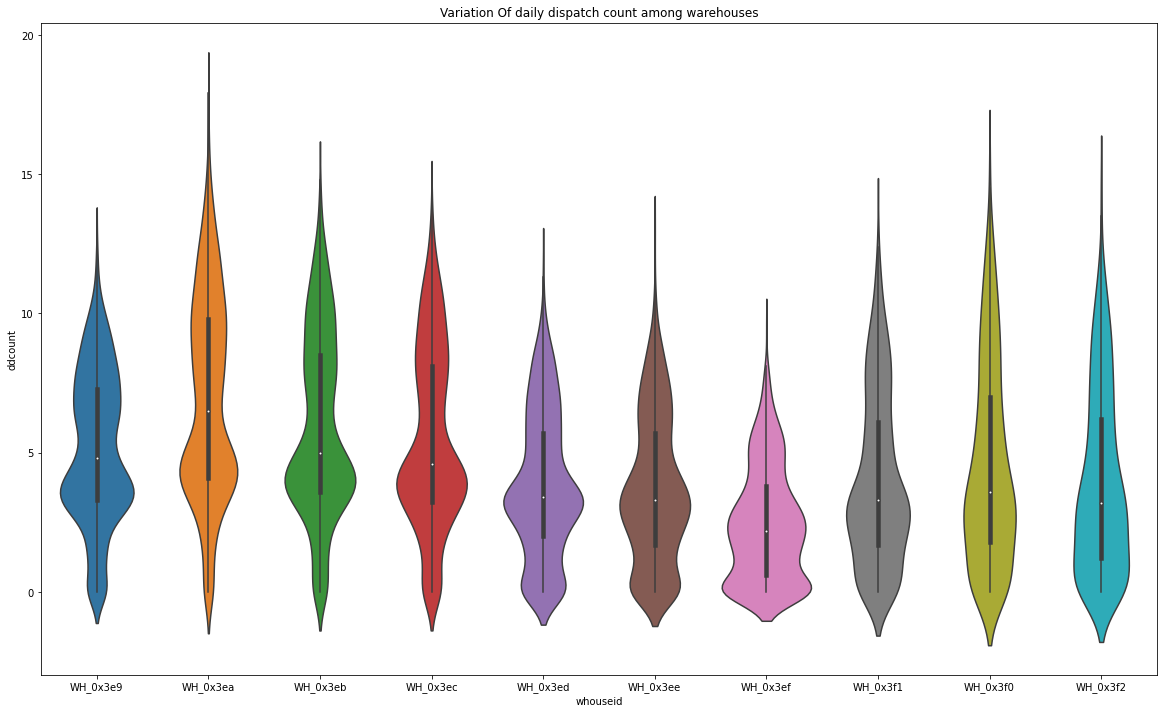

In [644]:
plt.figure(figsize=(20,12))
sns.violinplot(x='whouseid',y='ddcount', data=df).set_title('Variation Of daily dispatch count among warehouses')
plt.show()

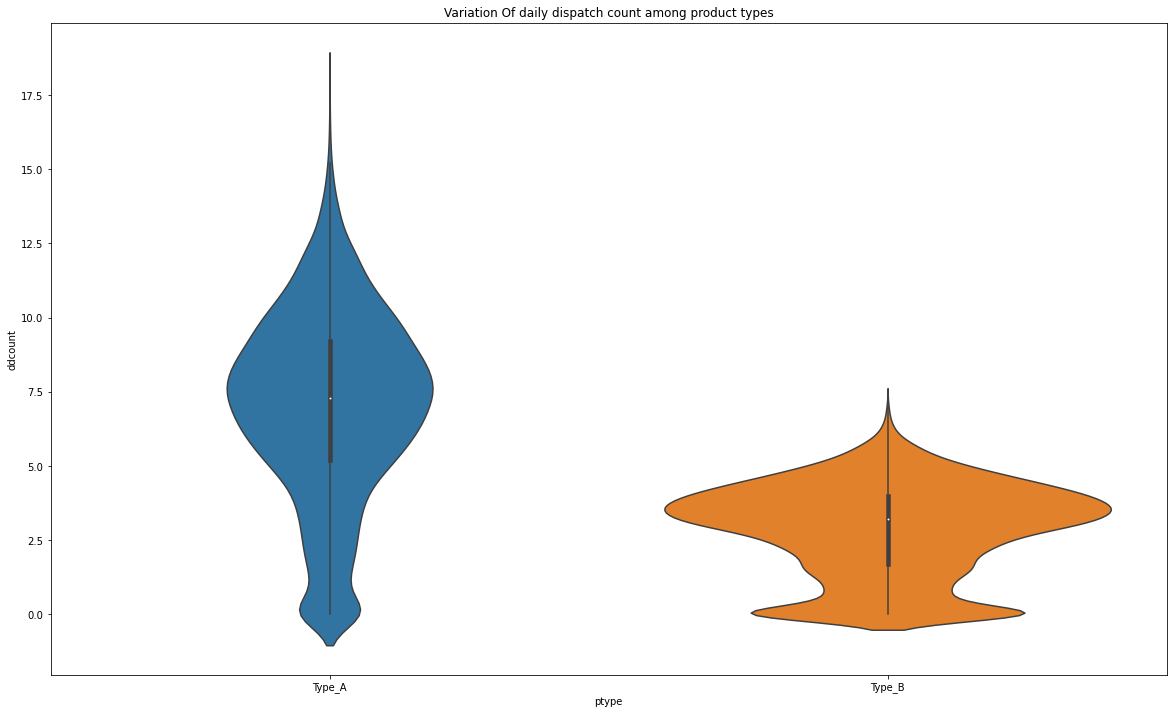

In [645]:
plt.figure(figsize=(20,12))
sns.violinplot(x='ptype',y='ddcount', data=df).set_title('Variation Of daily dispatch count among product types')
plt.show()

<AxesSubplot:xlabel='ptype', ylabel='Count'>

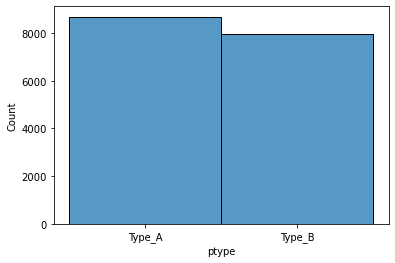

In [655]:
sns.histplot(x='ptype',data=df)

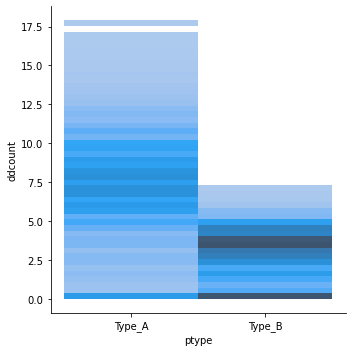

In [658]:
sns.displot(x='ptype',y='ddcount',data=df)

<AxesSubplot:xlabel='ddcount', ylabel='Density'>

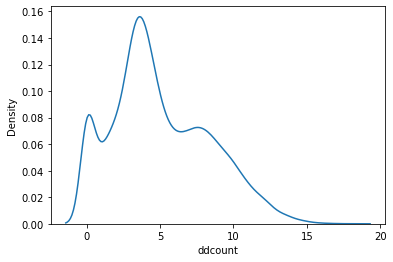

In [668]:
sns.kdeplot(x='ddcount',data=df)

<AxesSubplot:xlabel='Latitude', ylabel='Count'>

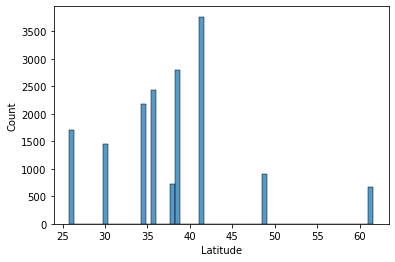

In [650]:
#df.Latitude.value_counts().plot(kind ='barh')
sns.histplot(x='Latitude',data=df)

<AxesSubplot:xlabel='Latitude', ylabel='ddcount'>

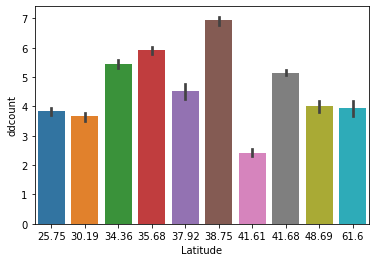

In [651]:
sns.barplot(x='Latitude',y='ddcount',data=df)

<AxesSubplot:xlabel='Longitude', ylabel='Count'>

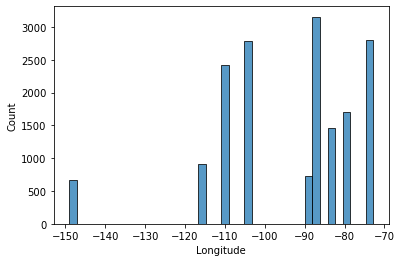

In [653]:
#df.Longitude.value_counts().plot(kind ='bar')
sns.histplot(x='Longitude',data=df)


<AxesSubplot:xlabel='Longitude', ylabel='ddcount'>

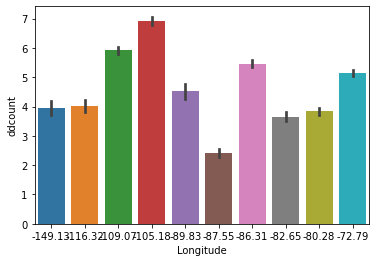

In [654]:
sns.barplot(x='Longitude',y='ddcount',data=df)

<AxesSubplot:>

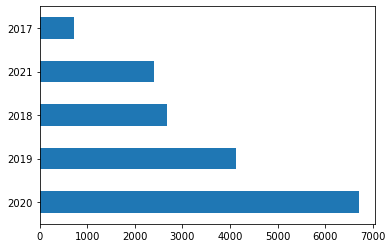

In [530]:
df.year.value_counts().plot(kind='barh')

<AxesSubplot:>

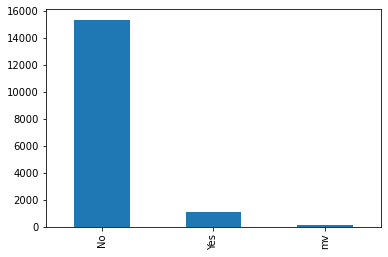

In [531]:
df.whclosed.value_counts().plot(kind='bar')

In [532]:
df.whclosed.value_counts()[0]//df.whclosed.value_counts()[1]

13

<AxesSubplot:>

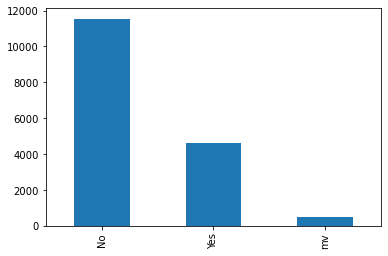

In [533]:
df.weekend.value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Density'>

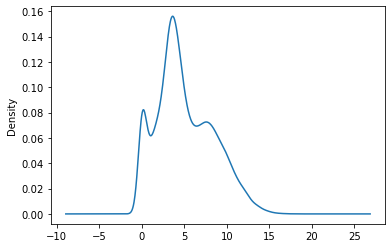

In [506]:
df.ddcount.plot(kind = 'density')

<AxesSubplot:ylabel='Density'>

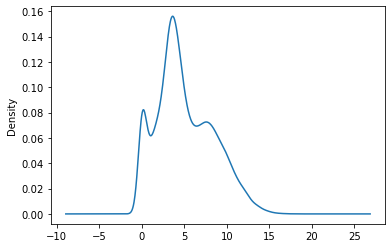

In [534]:
df.ddcount.plot(kind = 'density') ## for weekly stuff

#### finding  trends for time series analysis 
 

In [659]:
df.head()

,date,whouseid,Latitude,Longitude,ptype,year,month,weekend,whclosed,ddcount,wdcount
0,2017-01-01,WH_0x3e9,41.68,-72.79,Type_A,2017,January,Yes,No,5.5,5.5
1,2017-01-01,WH_0x3ea,38.75,-105.18,Type_A,2017,January,Yes,No,6.1,6.1
2,2017-01-02,WH_0x3e9,41.68,-72.79,Type_A,2017,January,No,No,4.8,mv
3,2017-01-02,WH_0x3ea,38.75,-105.18,Type_A,2017,January,No,No,6.7,mv
4,2017-01-03,WH_0x3e9,41.68,-72.79,Type_A,2017,January,No,No,5.8,mv


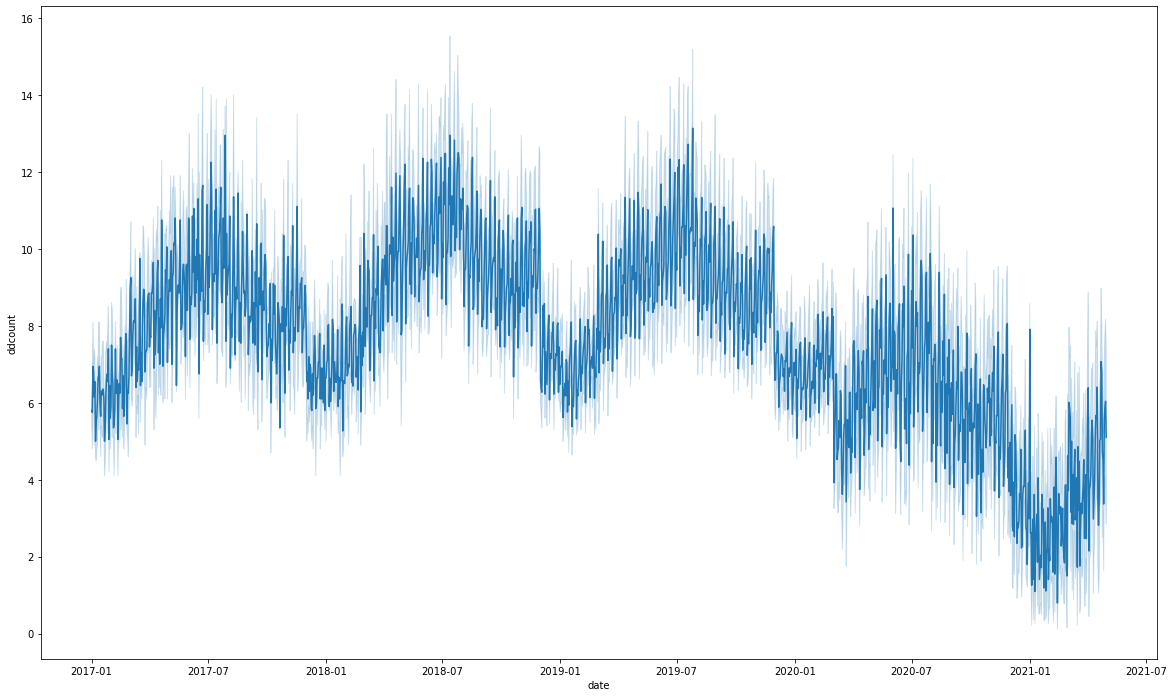

In [666]:
plt.figure(figsize=(20,12))
sns.lineplot(x='date',y='ddcount',data=df[df['ptype']=='Type_A'])
plt.show()
           

###  Data cleaning and preprocessing and transformation 
- Some Helper functions for transformation
- Datatype transformation

In [89]:
df.head()

,date,whouseid,Latitude,Longitude,ptype,year,month,weekend,whclosed,ddcount,wdcount,WeekNo
0,2017-01-01,WH_0x3e9,41.68,-72.79,Type_A,2017,January,True,No,5.5,5.5,52
1,2017-01-01,WH_0x3ea,38.75,-105.18,Type_A,2017,January,True,No,6.1,6.1,52
2,2017-01-02,WH_0x3e9,41.68,-72.79,Type_A,2017,January,False,No,4.8,mv,1
3,2017-01-02,WH_0x3ea,38.75,-105.18,Type_A,2017,January,False,No,6.7,mv,1
4,2017-01-03,WH_0x3e9,41.68,-72.79,Type_A,2017,January,False,No,5.8,mv,1


In [90]:
train_data_for_dailly_dispatch = df.drop(columns=['Latitude','Longitude','wdcount'])
train_data_for_weekly_dispatch = df[df['wdcount']!='mv'].drop(columns=['Latitude','Longitude','ddcount'])

In [91]:
train_data_for_dailly_dispatch

,date,whouseid,ptype,year,month,weekend,whclosed,ddcount,WeekNo
0,2017-01-01,WH_0x3e9,Type_A,2017,January,True,No,5.5,52
1,2017-01-01,WH_0x3ea,Type_A,2017,January,True,No,6.1,52
2,2017-01-02,WH_0x3e9,Type_A,2017,January,False,No,4.8,1
3,2017-01-02,WH_0x3ea,Type_A,2017,January,False,No,6.7,1
4,2017-01-03,WH_0x3e9,Type_A,2017,January,False,No,5.8,1
...,...,...,...,...,...,...,...,...,...
16627,2021-04-30,WH_0x3f0,Type_B,2021,April,False,No,0.2,17
16628,2021-04-30,WH_0x3f1,Type_A,2021,April,False,No,12.3,17
16629,2021-04-30,WH_0x3f1,Type_B,2021,April,False,No,3.3,17
16630,2021-04-30,WH_0x3f2,Type_A,2021,April,False,No,7.1,17


In [93]:
train_data_for_weekly_dispatch.reset_index(inplace=True)
train_data_for_weekly_dispatch.drop(columns=['index'],inplace= True)

In [94]:
train_data_for_weekly_dispatch

,date,whouseid,ptype,year,month,weekend,whclosed,wdcount,WeekNo
0,2017-01-01,WH_0x3e9,Type_A,2017,January,True,No,5.5,52
1,2017-01-01,WH_0x3ea,Type_A,2017,January,True,No,6.1,52
2,2017-01-08,WH_0x3e9,Type_A,2017,January,True,No,37.1,1
3,2017-01-08,WH_0x3ea,Type_A,2017,January,True,No,48.3,1
4,2017-01-15,WH_0x3e9,Type_A,2017,January,True,No,37.5,2
...,...,...,...,...,...,...,...,...,...
2346,2021-04-25,WH_0x3f0,Type_B,2021,April,True,No,16.8,16
2347,2021-04-25,WH_0x3f1,Type_A,2021,April,True,No,43.5,16
2348,2021-04-25,WH_0x3f1,Type_B,2021,April,True,Yes,12.3,16
2349,2021-04-25,WH_0x3f2,Type_A,2021,April,True,No,55.9,16


### Model Building 
-  #### Targets 
    - daily dispatch 
    - weekly dispatch 

In [138]:
# choise of models and reasoning behind them 
# regression problem 

In [139]:
# Individual models 

In [174]:
#Building a pipeline

#### Hyperparameter Optimisation

In [ ]:
# using grid search  or maybe optuna 

### Performance evaluation on holdout set 

In [140]:
# declaration of the best model 

In [141]:
# creation of performance csv

### Predictions and test score 

In [31]:
test_set = pd.read_csv('test.csv')

,ID,date,warehouse_ID,Latitude,Longitude,Product_Type,year,month,is_weekend,is_warehouse_closed
0,0x31fc,2021-05-01,WH_0x3e9,41.681471,NaN,Type_A,2021,May,NaN,No
1,0x31fd,2021-05-01,WH_0x3e9,41.681471,NaN,Type_B,2021,May,Yes,No
2,0x3ed2,2021-05-01,WH_0x3ea,38.749077,-105.183060,Type_A,2021,May,Yes,No
3,0x3ed3,2021-05-01,WH_0x3ea,38.749077,-105.183060,Type_B,2021,May,Yes,No
4,0x4a3a,2021-05-01,WH_0x3eb,35.678970,-109.067413,Type_A,2021,May,Yes,Yes


In [671]:
sample_submision = pd.read_csv('sample_submission.csv')

In [672]:
sample_submision.head()

,ID,weekly_dispatch_count
0,0x2d3e,1000
1,0x3460,1000
2,0x3b82,1000
3,0x42a4,1000
4,0x49c6,1000


In [36]:
submision = pd.read_csv('submission_weekly.csv')

In [37]:
submision.head()


,ID,weekly_dispatch_count
0,0x31fe,NaN
1,0x31ff,NaN
2,0x3ed4,NaN
3,0x3ed5,NaN
4,0x4a3c,NaN


In [ ]:
def evaluation_via_pipeline(validation_set_X,validation_set_y,fit_models):
    models=['Rf','Gb','Ridge','Lasso','Enet']
    performances={}
    for model in models:
        print(model)
        prediction = fit_models[model].predict(validation_set_X)
        print(len(prediction))
        print(len(np.array(validation_set_y)))
        performance = 100*(1 - mean_absolute_percentage_error(np.array(validation_set_y),prediction))
        print(performance)
        performances[model]=performance
    return performances

In [ ]:
# submission.csv for prediction results 

#### Deployment (If time persists , otherwise do this later 